# Deep Learning Practice 1-2: using Model Zoo with Caffe
 
- 2016 November 26, Heo, Min-Oh

## 1. Introduction

Model Zoo
   *  http://caffe.berkeleyvision.org/model_zoo.html
   * https://github.com/BVLC/caffe/wiki/Model-Zoo


In [2]:
import caffe
caffe.set_mode_gpu()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# display plots in this notebook
%matplotlib inline

#plt.rcParams['figure.figsize'] = (10, 10)        # large images
#plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
#plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

## 2. Download models 

Visit Model-Zoo webpage.

Look and find models you are interested in regarding ...

### Tasks

    1. Age and Gender classification using CNN
    2. Car classification using GoogLeNet_cars
    3. Face recognition
    4. ...

also possible to use

### RNN application (should use recurrent branch)
    1. Image captioning (image to text)
    2. Video captioning (video to text)
    3. ......

## 3. download the followings in the model-zoo
1. caffemodel file
2. prototxt files
3. mean file (if necessary)



In [4]:
# loading the mean image
mean_filename='./models/age_net/mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

In [5]:
mu=mean.mean(1).mean(1)
mean.shape
mu.shape

(3,)

In [68]:
#!cat ./models/age_net/deploy_age.prototxt

## Age / Gender net application
reference: http://nbviewer.ipython.org/url/www.openu.ac.il/home/hassner/projects/cnn_agegender/cnn_age_gender_demo.ipynb


In [14]:
age_net_pretrained='./models/age_net/age_net.caffemodel'
age_net_model_file='./models/age_net/deploy_age.prototxt'
age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       mean=mu,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [15]:
gender_net_pretrained='./models/gender_net/gender_net.caffemodel'
gender_net_model_file='./models/gender_net/deploy_gender.prototxt'
gender_net = caffe.Classifier(gender_net_model_file, gender_net_pretrained,
                       mean=mu,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [30]:
age_net.blobs['data'].data.shape

(1, 3, 227, 227)

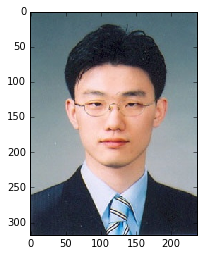

In [71]:
# input image
# moheo.jpg, mom.jpg, lady.jpg
image = caffe.io.load_image('./examples/images/moheo.jpg')
plt.imshow(image)

In [72]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

In [73]:
prediction = age_net.predict([image]) 

print 'predicted age:', age_list[prediction[0].argmax()]

predicted age: (15, 20)


In [74]:
prediction = gender_net.predict([image]) 

print 'predicted gender:', gender_list[prediction[0].argmax()]

predicted gender: Male
